In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# EXPLORAÇÃO DE DADOS TABELA CREDITO

# Estruturação dos dados

Para uma análise exploratória é crucial que se faça um atrelamento adequado para os tipos de variáveis para que a tabela criada consiga trazer as informações corretamente.
abaixo é mostrado as variáveis e seus tipos de dados;

* idade = int
* sexo = string
* dependentes = int
* escolaridade = string
* estado civil = string
* salario_anual = string
* tipo_cartao = string
* qtd_produtos = bigint
* iteracoes_12m = int
* meses_inativo_12m = int
* limite_credito =float
* valor_transacoes_12m float
* qtd_transacoes_12m int

Os dados acima represemtam informações de clientes de um banco específico. 

Uma vez que tenhamos os dados planilhados podemos criar um bucket na plataforma (AWS) no setor (s3)fazendo o upload do arquivo e criando a tabela no setor (athena) utilizando as informações dos tipos de dados acima, com isso conseguimos por query extrair informações relevantes como será demonstrado abaixo.





# Visualisando a tabela criada por query

Agora, por meio de consulta podemos visualizar de modo geral o que a tabela pode nos entregar de informação.
Para isso utilizaremos o código abaixo :

select*from credito

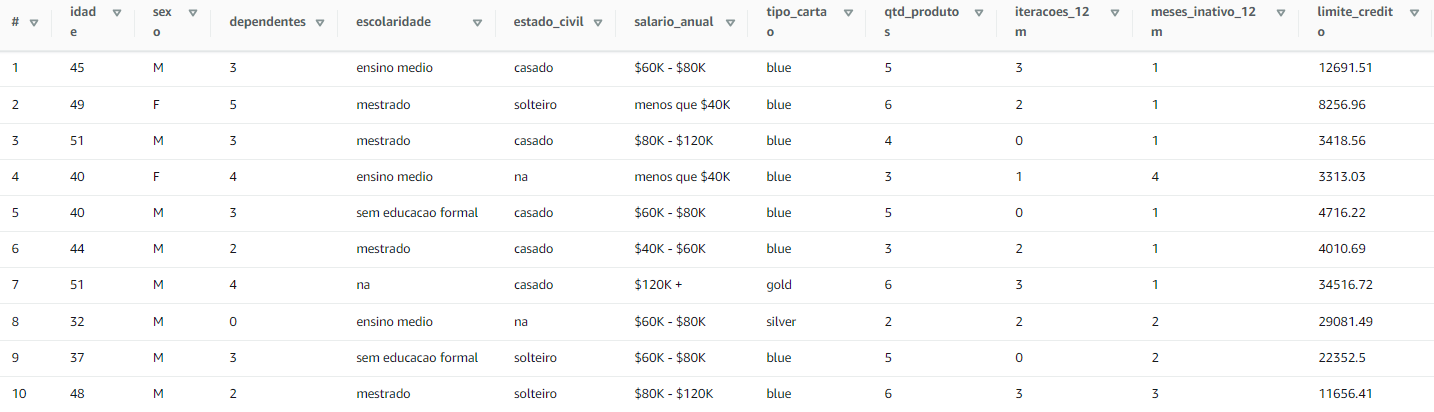

Podemos extrair algumas informações com base em cálculos aritiméticos.

# Média de Quantidade de Produtos

select avg(qtd_produtos) as MEDIA_QTD_PRODUTOS from credito


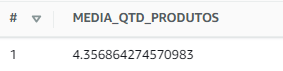

# Valor Máximo e Mínimo de Produtos

select max(qtd_produtos) as MAXIMO_QTD_PRODUTOS, min(qtd_produtos) as MINIMO_QTD_PRODUTOS from credito

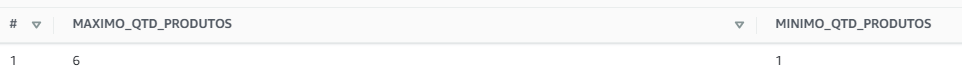

# Tipos de Escolaridade

select distinct ESCOLARIDADE from credito

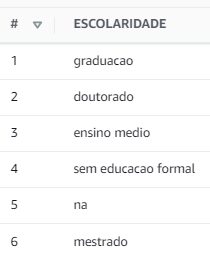

Nesse caso acima temos de forma distinta todos os tipos de escolaridade da tabela, abaixo o estado civil.

# Estado Civil

select distinct Estado_civil from credito

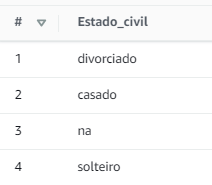






# Agrupando Informações

Podemos extrair informações de forma agrupada por exemplo:
Qual é o valor total de limite atribuído a clientes por tipo de cartão.

select sum(limite_credito) as LIMITE_CREDITO, tipo_cartao from credito group by tipo_cartao

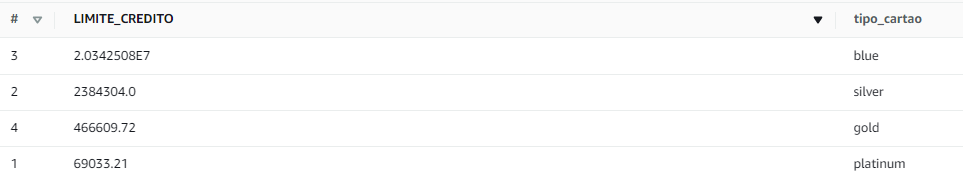

Conforme mostrado na tabela acima a soma total do  limite de crédito para os cartões do tipo blue é o de maior valor podendo ser o limite de crédito atríbuido ou a quantidade de clientes que utilizam o cartão azul. É possivel tirar uma conclusão verificando a quantidade de cartões por cores conforme mostrado abaixo.

select tipo_cartao, count(tipo_cartao) as QTD_CARTOES from credito group by tipo_cartao

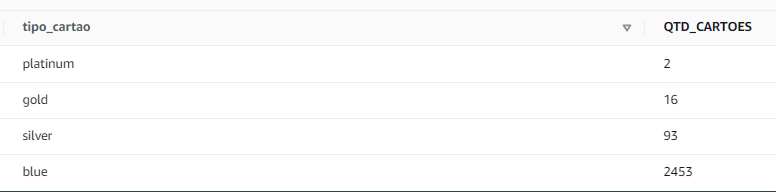

Podemos concluir que o volume de cartões (blue) é o de maior quantidade isso mostra que a soma do limite de blue é maior pela quantidade de clientes e não pelo limite que 0 cartão corresponde

Podemos analisar a média de idade agrupados por sexo e escolaridade, conforme mostrado na tabela abaixo.

select  avg(idade) as MEDIA_IDADE,  escolaridade, sexo  from credito group by sexo, escolaridade

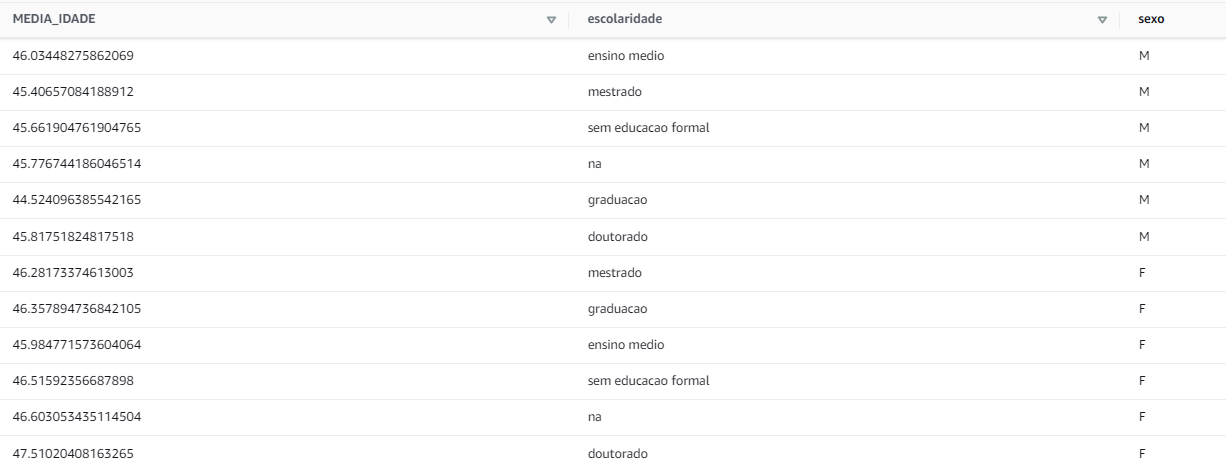


Podemos realizar uma filtragem agrupando pela escolaridade onde podemos extrair apenas o sexo feminino e masculino conforme mostrado nas tabelas abaixo.

select  avg(idade) as MEDIA_IDADE, SEXO, escolaridade from credito
where sexo ='F'
group by  escolaridade, SEXO

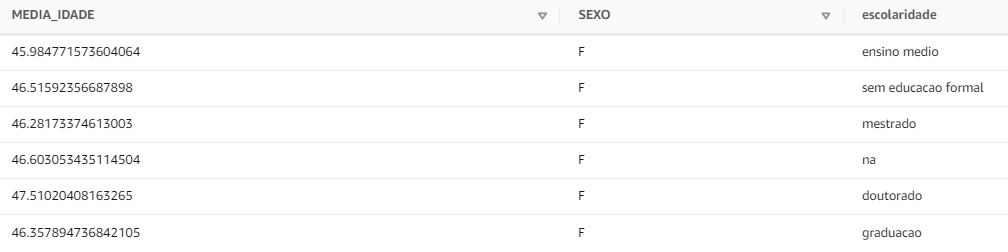

select  avg(idade) as MEDIA_IDADE, SEXO, escolaridade from credito
where sexo ='M'
group by  escolaridade, SEXO

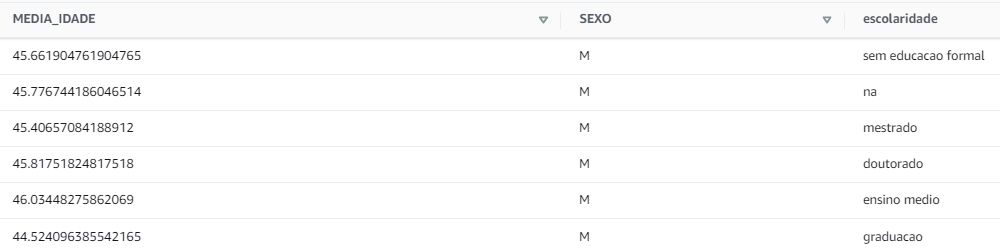

Conclui - se que que não há diferença significativa entre as idades de sexo masculino e feminino  em caráter de escolaridade.

# Resultados Mostrados em Gráficos

Uma ótima forma de entregar resultados é mostra-los graficamente pois visualmente ficam mais claros.

O código abaixo nos traz o uso de tipo de cartões com base na média de idade dos usuários do sexo feminino e masculino.

select  avg(idade) as MEDIA_IDADE,  tipo_cartao from credito
where sexo ='F'
group by   tipo_cartao

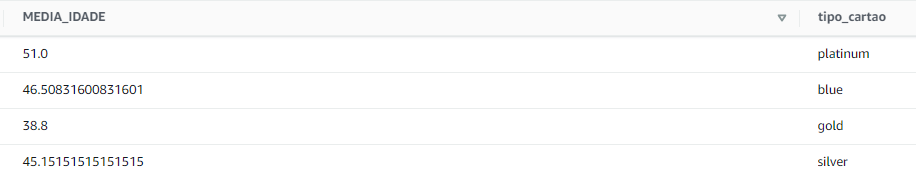

select  avg(idade) as MEDIA_IDADE,  tipo_cartao from credito
where sexo ='M'
group by   tipo_cartao

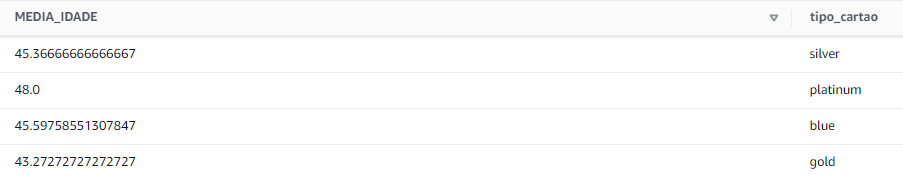


Podemos observar abaixo uma grande diferença na facilidade de interpretar os resultados.

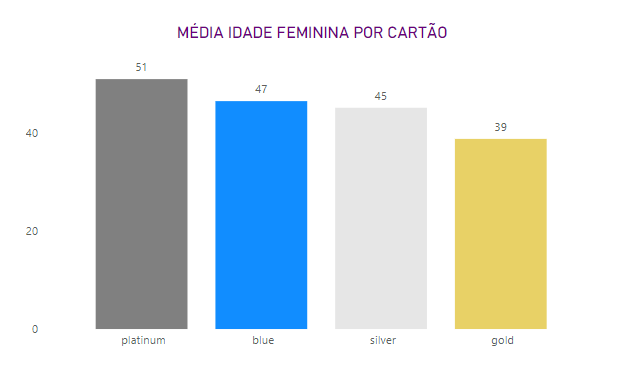

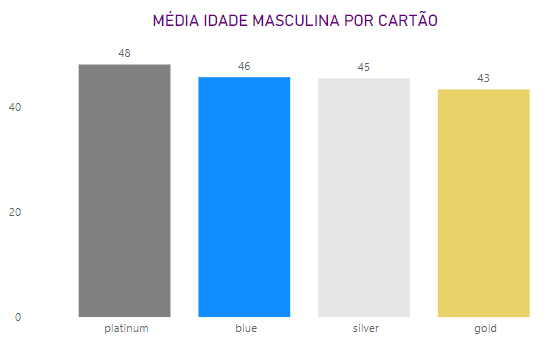

É muito claro entender que o cartão (platinium) é utilizado com mulheres com idade média de 51 anos de idade e homens com 48 anos.


Podemos analisar em grau de escolaridade qual é a media de idade e tipo de cartão utilizado para aqueles de ambos os sexos que possuem grau de escolaridade a nível de mestrado.

select  avg(idade) as MEDIA_IDADE,  tipo_cartao, sexo, escolaridade from credito
where escolaridade ='mestrado'
and sexo ='M'
group by   tipo_cartao, sexo, escolaridade

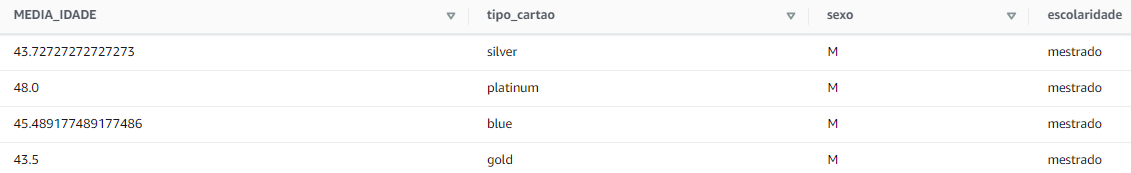

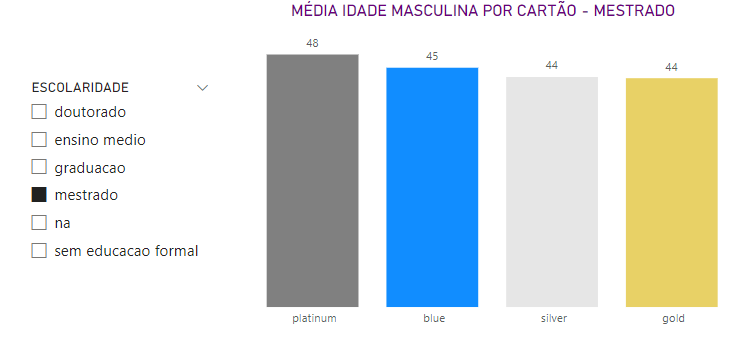












select  avg(idade) as MEDIA_IDADE,  tipo_cartao, sexo, escolaridade from credito
where escolaridade ='mestrado'
and sexo ='F'
group by   tipo_cartao, sexo, escolaridade

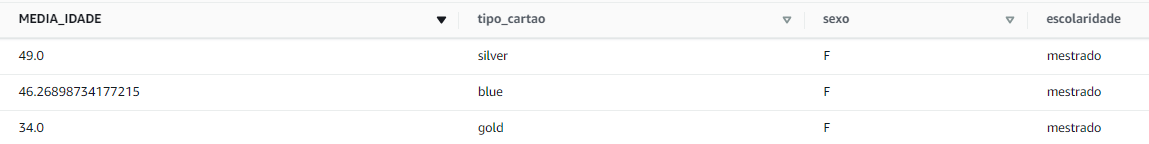

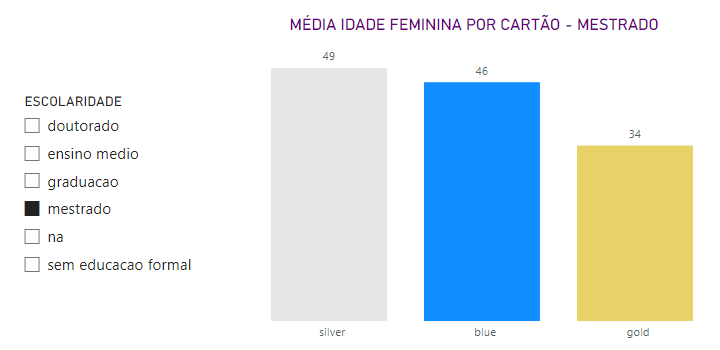

Nesse gráfico podemos concluir que mulheres com escolaridade em mestrado não utilizam o cartão platinium


Abaixo é extraído a quantidade de cartões por tipo, da tabela.

select tipo_cartao, count(*) QUANTIDADE from credito
group by tipo_cartao

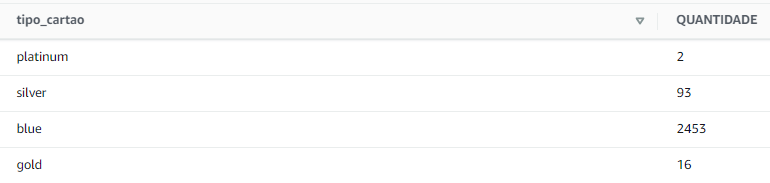

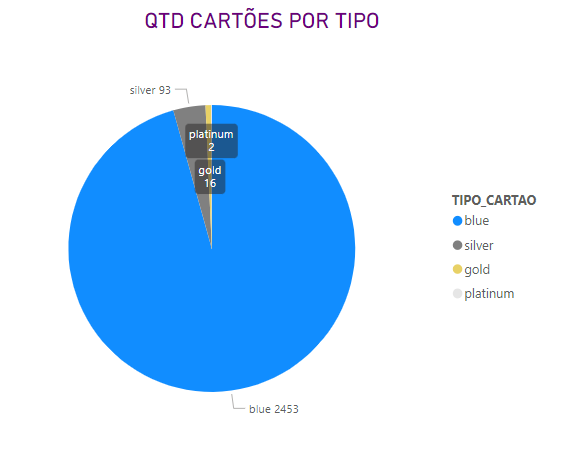

Podemos observar que a maior quantidade se concentra em blue e a menor em platinum

Abaixo dados de quantidade, tipo de cartão por estado civil

select tipo_cartao, count(*) QUANTIDADE, estado_civil from credito
group by tipo_cartao, estado_civil

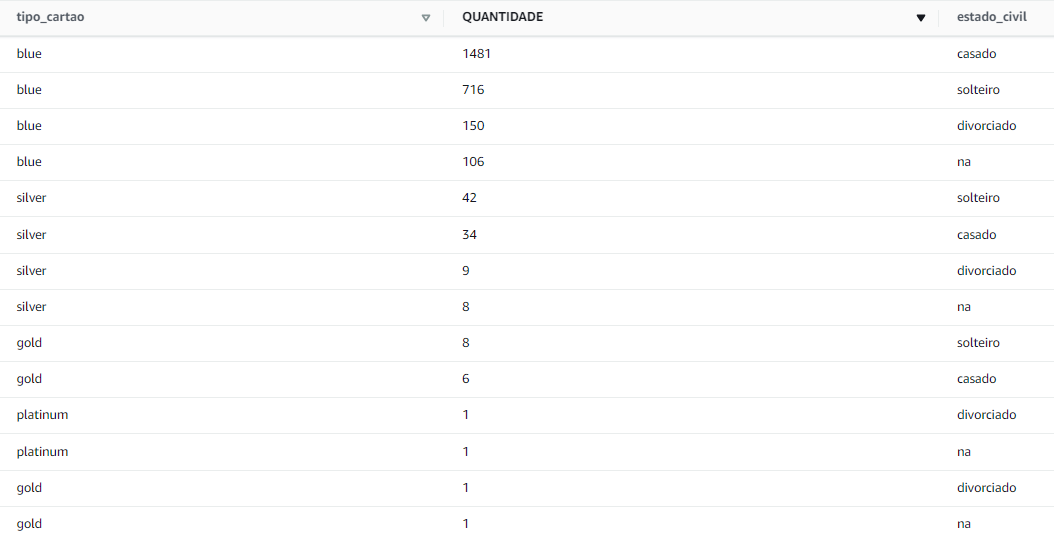
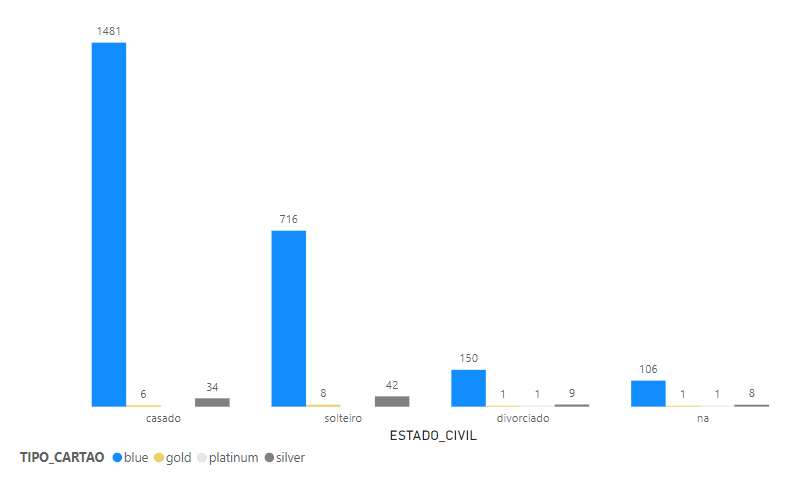



Casados e solteiros são os que mais utilizam cartão blue e silver.

